In [1]:
# Imports des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Bibliothèques chargées avec succès !")

✅ Bibliothèques chargées avec succès !


In [2]:
# Chemins des fichiers
data_path = '../data/raw/'

# Chargement des fichiers CSV
print("📂 Chargement des données...")

events = pd.read_csv(data_path + 'events.csv')
category_tree = pd.read_csv(data_path + 'category_tree.csv')
item_prop1 = pd.read_csv(data_path + 'item_properties_part1.csv')
item_prop2 = pd.read_csv(data_path + 'item_properties_part2.csv')

print("✅ Données chargées !")
print(f"\n📊 Nombre de lignes :")
print(f"  - Events: {len(events):,}")
print(f"  - Category tree: {len(category_tree):,}")
print(f"  - Item properties 1: {len(item_prop1):,}")
print(f"  - Item properties 2: {len(item_prop2):,}")

📂 Chargement des données...


✅ Données chargées !

📊 Nombre de lignes :
  - Events: 2,756,101
  - Category tree: 1,669
  - Item properties 1: 10,999,999
  - Item properties 2: 9,275,903


In [3]:
# Exploration du fichier Events (le plus important)
print("=" * 60)
print("📌 FICHIER EVENTS - Aperçu")
print("=" * 60)
print("\n🔍 Premières lignes :")
print(events.head(10))

print("\n📋 Informations générales :")
print(events.info())

print("\n📊 Statistiques descriptives :")
print(events.describe())

print("\n🔢 Valeurs uniques par colonne :")
for col in events.columns:
    print(f"  - {col}: {events[col].nunique():,} valeurs uniques")

📌 FICHIER EVENTS - Aperçu

🔍 Premières lignes :
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
5  1433224086234     972639  view   22556            NaN
6  1433221923240     810725  view  443030            NaN
7  1433223291897     794181  view  439202            NaN
8  1433220899221     824915  view  428805            NaN
9  1433221204592     339335  view   82389            NaN

📋 Informations générales :
<class 'pandas.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          str    
 3   itemid         int64  
 4   transactionid  float64


          timestamp     visitorid        itemid  transactionid
count  2.756101e+06  2.756101e+06  2.756101e+06   22457.000000
mean   1.436424e+12  7.019229e+05  2.349225e+05    8826.497796
std    3.366312e+09  4.056875e+05  1.341954e+05    5098.996290
min    1.430622e+12  0.000000e+00  3.000000e+00       0.000000
25%    1.433478e+12  3.505660e+05  1.181200e+05    4411.000000
50%    1.436453e+12  7.020600e+05  2.360670e+05    8813.000000
75%    1.439225e+12  1.053437e+06  3.507150e+05   13224.000000
max    1.442545e+12  1.407579e+06  4.668670e+05   17671.000000

🔢 Valeurs uniques par colonne :


  - timestamp: 2,750,455 valeurs uniques
  - visitorid: 1,407,580 valeurs uniques
  - event: 3 valeurs uniques


  - itemid: 235,061 valeurs uniques
  - transactionid: 17,672 valeurs uniques


📌 RÉPARTITION DES ÉVÉNEMENTS

📊 Nombre d'événements par type :


event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

📈 Pourcentage par type :


event
view           96.67
addtocart       2.52
transaction     0.81
Name: proportion, dtype: float64


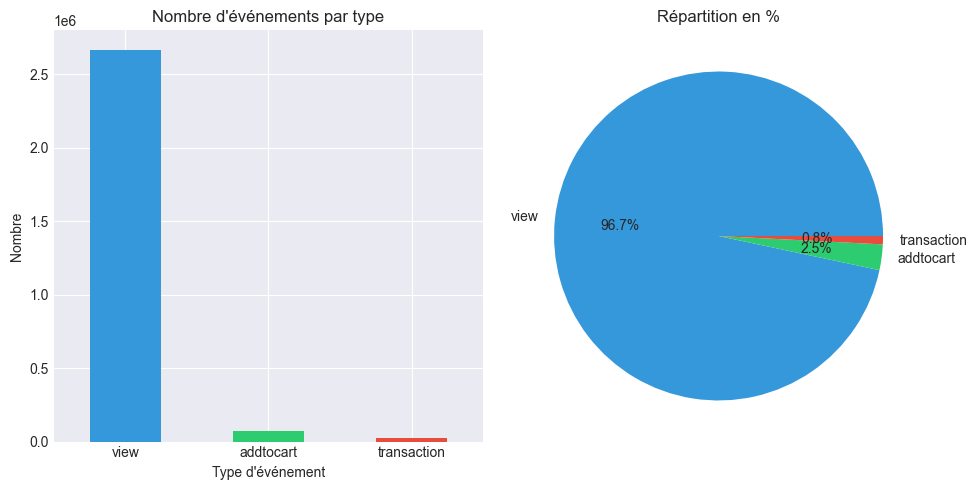


✅ Graphique sauvegardé dans reports/figures/


In [4]:
# Analyse des types d'événements
print("=" * 60)
print("📌 RÉPARTITION DES ÉVÉNEMENTS")
print("=" * 60)

print("\n📊 Nombre d'événements par type :")
event_counts = events['event'].value_counts()
print(event_counts)

print("\n📈 Pourcentage par type :")
event_percent = events['event'].value_counts(normalize=True) * 100
print(event_percent.round(2))

# Visualisation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
event_counts.plot(kind='bar', color=['#3498db', '#2ecc71', '#e74c3c'])
plt.title('Nombre d\'événements par type')
plt.xlabel('Type d\'événement')
plt.ylabel('Nombre')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
event_percent.plot(kind='pie', autopct='%1.1f%%', colors=['#3498db', '#2ecc71', '#e74c3c'])
plt.title('Répartition en %')
plt.ylabel('')

plt.tight_layout()
plt.savefig('../reports/figures/event_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé dans reports/figures/")

📌 FUNNEL DE CONVERSION

1️⃣  Vues (view)         : 2,664,312
2️⃣  Ajouts panier (add) : 69,332
3️⃣  Achats (transaction): 22,457

📊 TAUX DE CONVERSION :
  Vue → Panier   : 2.60%
  Vue → Achat    : 0.84%
  Panier → Achat : 32.39%


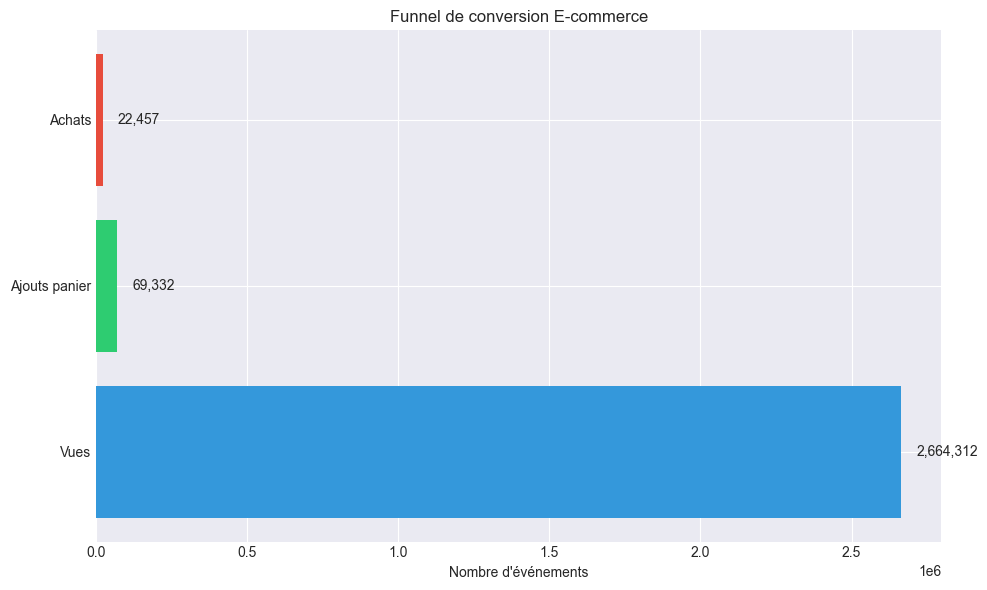


✅ Graphique sauvegardé !


In [5]:
# Calcul du funnel de conversion
print("=" * 60)
print("📌 FUNNEL DE CONVERSION")
print("=" * 60)

total_views = event_counts.get('view', 0)
total_addtocart = event_counts.get('addtocart', 0)
total_transactions = event_counts.get('transaction', 0)

print(f"\n1️⃣  Vues (view)         : {total_views:,}")
print(f"2️⃣  Ajouts panier (add) : {total_addtocart:,}")
print(f"3️⃣  Achats (transaction): {total_transactions:,}")

# Taux de conversion
if total_views > 0:
    view_to_cart = (total_addtocart / total_views) * 100
    view_to_purchase = (total_transactions / total_views) * 100
    print(f"\n📊 TAUX DE CONVERSION :")
    print(f"  Vue → Panier   : {view_to_cart:.2f}%")
    print(f"  Vue → Achat    : {view_to_purchase:.2f}%")
    
if total_addtocart > 0:
    cart_to_purchase = (total_transactions / total_addtocart) * 100
    print(f"  Panier → Achat : {cart_to_purchase:.2f}%")

# Visualisation du funnel
stages = ['Vues', 'Ajouts panier', 'Achats']
values = [total_views, total_addtocart, total_transactions]

plt.figure(figsize=(10, 6))
colors = ['#3498db', '#2ecc71', '#e74c3c']
plt.barh(stages, values, color=colors)
plt.xlabel('Nombre d\'événements')
plt.title('Funnel de conversion E-commerce')
for i, v in enumerate(values):
    plt.text(v + 50000, i, f'{v:,}', va='center')
plt.tight_layout()
plt.savefig('../reports/figures/conversion_funnel.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé !")

In [6]:
# Conversion du timestamp en date lisible
print("=" * 60)
print("📌 ANALYSE TEMPORELLE")
print("=" * 60)

# Convertir timestamp (millisecondes) en datetime
events['datetime'] = pd.to_datetime(events['timestamp'], unit='ms')
events['date'] = events['datetime'].dt.date
events['hour'] = events['datetime'].dt.hour
events['day_of_week'] = events['datetime'].dt.day_name()

print("\n📅 Période couverte par les données :")
print(f"  Du : {events['datetime'].min()}")
print(f"  Au : {events['datetime'].max()}")
print(f"  Durée : {(events['datetime'].max() - events['datetime'].min()).days} jours")

print("\n🔍 Aperçu avec les nouvelles colonnes :")
print(events[['datetime', 'visitorid', 'event', 'itemid']].head(10))

📌 ANALYSE TEMPORELLE



📅 Période couverte par les données :
  Du : 2015-05-03 03:00:04.384000
  Au : 2015-09-18 02:59:47.788000
  Durée : 137 jours

🔍 Aperçu avec les nouvelles colonnes :
                 datetime  visitorid event  itemid
0 2015-06-02 05:02:12.117     257597  view  355908
1 2015-06-02 05:50:14.164     992329  view  248676
2 2015-06-02 05:13:19.827     111016  view  318965
3 2015-06-02 05:12:35.914     483717  view  253185
4 2015-06-02 05:02:17.106     951259  view  367447
5 2015-06-02 05:48:06.234     972639  view   22556
6 2015-06-02 05:12:03.240     810725  view  443030
7 2015-06-02 05:34:51.897     794181  view  439202
8 2015-06-02 04:54:59.221     824915  view  428805
9 2015-06-02 05:00:04.592     339335  view   82389


📌 ACTIVITÉ PAR HEURE DE LA JOURNÉE



📊 Nombre d'événements par heure :
event  addtocart  transaction    view
hour                                 
0           3725         1119  139459
1           3578         1037  136087
2           3337         1012  141530
3           3266          836  146758
4           3141          747  143296
5           2786          747  116039
6           1803          477   74692
7           1028          278   42638
8            540          106   24663
9            399           70   17440
10           306           57   16045
11           389           84   19857
12           647          103   30736
13          1106          215   49768
14          1844          455   79524
15          3233         1138  124721
16          4341         1621  155822
17          5040         2000  172611
18          4973         1907  174320
19          5094         1891  176363
20          5222         1817  180880
21          4891         1829  177577
22          4723         1600  169633
23          392

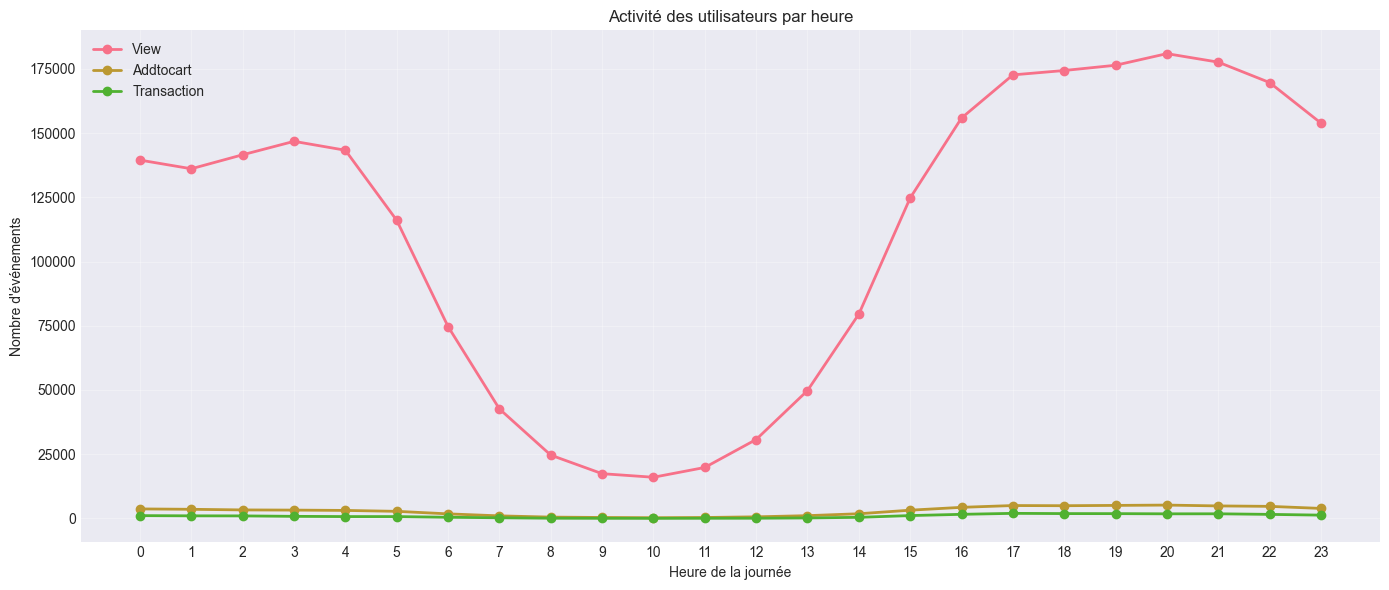


⏰ HEURES DE PIC D'ACTIVITÉ :
hour
20    187919
21    184297
19    183348
18    181200
17    179651
dtype: int64

✅ Graphique sauvegardé !


In [7]:
# Analyse du comportement par heure
print("=" * 60)
print("📌 ACTIVITÉ PAR HEURE DE LA JOURNÉE")
print("=" * 60)

hourly_events = events.groupby(['hour', 'event']).size().unstack(fill_value=0)
print("\n📊 Nombre d'événements par heure :")
print(hourly_events)

# Visualisation
plt.figure(figsize=(14, 6))

for event_type in ['view', 'addtocart', 'transaction']:
    if event_type in hourly_events.columns:
        plt.plot(hourly_events.index, hourly_events[event_type], 
                marker='o', label=event_type.capitalize(), linewidth=2)

plt.xlabel('Heure de la journée')
plt.ylabel('Nombre d\'événements')
plt.title('Activité des utilisateurs par heure')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig('../reports/figures/hourly_activity.png', dpi=300, bbox_inches='tight')
plt.show()

# Identifier les heures de pic
print("\n⏰ HEURES DE PIC D'ACTIVITÉ :")
total_by_hour = events.groupby('hour').size().sort_values(ascending=False)
print(total_by_hour.head(5))

print("\n✅ Graphique sauvegardé !")

📌 TOP PRODUITS



🔝 Top 20 produits les plus vus :
itemid
187946    3410
461686    2539
5411      2325
370653    1854
219512    1740
298009    1642
96924     1633
309778    1565
257040    1531
384302    1528
335975    1428
111530    1397
441668    1389
7943      1346
320130    1333
151444    1230
234255    1214
190000    1164
142466    1135
37029     1131
Name: count, dtype: int64

💰 Top 20 produits les plus achetés :
itemid
461686    133
119736     97
213834     92
7943       46
312728     46
445351     45
48030      41
420960     38
248455     38
17478      37
409804     35
320130     33
416017     32
46156      31
369447     31
268883     29
334401     28
257040     27
441852     27
9877       25
Name: count, dtype: int64


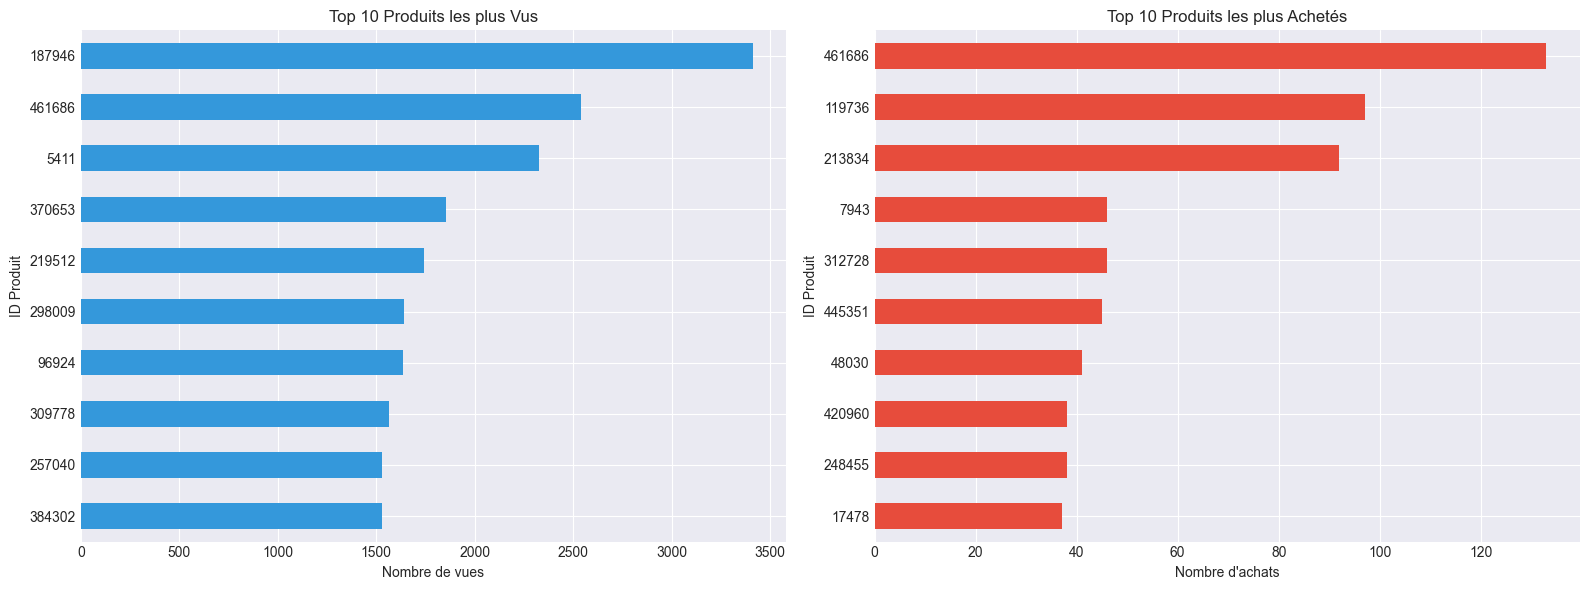


✅ Graphique sauvegardé !


In [8]:
# Analyse des produits les plus populaires
print("=" * 60)
print("📌 TOP PRODUITS")
print("=" * 60)

# Top produits vus
top_viewed = events[events['event'] == 'view']['itemid'].value_counts().head(20)
print("\n🔝 Top 20 produits les plus vus :")
print(top_viewed)

# Top produits achetés
top_purchased = events[events['event'] == 'transaction']['itemid'].value_counts().head(20)
print("\n💰 Top 20 produits les plus achetés :")
print(top_purchased)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Produits les plus vus
top_viewed.head(10).plot(kind='barh', ax=axes[0], color='#3498db')
axes[0].set_title('Top 10 Produits les plus Vus')
axes[0].set_xlabel('Nombre de vues')
axes[0].set_ylabel('ID Produit')
axes[0].invert_yaxis()

# Produits les plus achetés
top_purchased.head(10).plot(kind='barh', ax=axes[1], color='#e74c3c')
axes[1].set_title('Top 10 Produits les plus Achetés')
axes[1].set_xlabel('Nombre d\'achats')
axes[1].set_ylabel('ID Produit')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../reports/figures/top_products.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Graphique sauvegardé !")

In [9]:
# Sauvegarder les données enrichies pour analyse future
print("=" * 60)
print("📌 SAUVEGARDE DES DONNÉES ENRICHIES")
print("=" * 60)

# Créer un dataset nettoyé avec les nouvelles colonnes
events_clean = events[['datetime', 'date', 'hour', 'day_of_week', 
                       'visitorid', 'event', 'itemid', 'transactionid']].copy()

# Sauvegarder (échantillon pour ne pas surcharger)
print("\n💾 Sauvegarde en cours...")
events_clean.to_csv('../data/processed/events_clean.csv', index=False)
print(f"✅ Fichier sauvegardé : {len(events_clean):,} lignes")

# Créer aussi un résumé des KPIs
kpis = {
    'total_events': len(events),
    'total_visitors': events['visitorid'].nunique(),
    'total_products': events['itemid'].nunique(),
    'total_views': total_views,
    'total_addtocart': total_addtocart,
    'total_transactions': total_transactions,
    'conversion_rate_view_to_purchase': round(view_to_purchase, 2),
    'conversion_rate_cart_to_purchase': round(cart_to_purchase, 2),
    'period_days': (events['datetime'].max() - events['datetime'].min()).days
}

kpis_df = pd.DataFrame([kpis])
kpis_df.to_csv('../data/processed/kpis_summary.csv', index=False)
print("✅ KPIs sauvegardés dans kpis_summary.csv")

print("\n📊 RÉSUMÉ DES KPIs :")
for key, value in kpis.items():
    print(f"  {key}: {value:,}")

📌 SAUVEGARDE DES DONNÉES ENRICHIES

💾 Sauvegarde en cours...


✅ Fichier sauvegardé : 2,756,101 lignes
✅ KPIs sauvegardés dans kpis_summary.csv

📊 RÉSUMÉ DES KPIs :
  total_events: 2,756,101
  total_visitors: 1,407,580
  total_products: 235,061
  total_views: 2,664,312
  total_addtocart: 69,332
  total_transactions: 22,457
  conversion_rate_view_to_purchase: 0.84
  conversion_rate_cart_to_purchase: 32.39
  period_days: 137
